In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime, sys
import numpy as np

%matplotlib inline

In [2]:
def parse(t):
    string_ = str(t)
    try:
        return datetime.date(int(string_[:4]), int(string_[4:6]), int(string_[6:]))
    except:
        return datetime.date(1900,1,1)

In [15]:
def readAllFiles():
    allFiles = glob.iglob("data/atp_rankings_" + "*.csv")
    ranks = pd.DataFrame()
    list_ = list()
    for filen in allFiles:
        df = pd.read_csv(filen,
                         index_col=None,
                         header=None,
                         parse_dates=[0],
                         date_parser=lambda t:parse(t),
                         names = ["ranking_date", "ranking", "player_id", "ranking_points"])
        list_.append(df)
    ranks = pd.concat(list_)
    return ranks

In [16]:
def readPlayers():
    return pd.read_csv("data/atp_players.csv",
                       index_col=None,
                       header=None,
                       parse_dates=[4],
                       names = ["player_id", "first_name", "last_name", "hand", "birth_date", "country_code"],
                       date_parser=lambda t:parse(t))

In [24]:
# merge rankings with players but keep only top 100

ranks = readAllFiles()
ranks = ranks[(ranks['ranking']<100)]
ranks['player_id'] = ranks['player_id'].apply(lambda row: int(row))
players = readPlayers()
players = ranks.merge(players,right_on="player_id",left_on="player_id")
players.head()

/Users/claudiucreanga/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,ranking_date,ranking,player_id,ranking_points,first_name,last_name,hand,birth_date,country_code
0,2000-01-10,1,101736,4135,Andre,Agassi,R,1970-04-29,USA
1,2000-01-17,1,101736,4135,Andre,Agassi,R,1970-04-29,USA
2,2000-01-31,1,101736,5045,Andre,Agassi,R,1970-04-29,USA
3,2000-02-07,1,101736,5045,Andre,Agassi,R,1970-04-29,USA
4,2000-02-14,1,101736,5045,Andre,Agassi,R,1970-04-29,USA


In [129]:
# we are interested in ranking date, country code and counting the number of players. 
# To keep the data cleaner get only countries with at least 4 players in top 100

aggregate = players[["ranking_date", "country_code"]].groupby(["ranking_date","country_code"]).size().to_frame()
aggregate = pd.DataFrame(aggregate.to_records())
aggregate_least_4 = aggregate[(aggregate["0"] > 3)]
aggregate_least_4.head()

,ranking_date,country_code,0
1,1973-08-23,AUS,17
5,1973-08-23,CZE,4
7,1973-08-23,ESP,4
8,1973-08-23,FRA,7
9,1973-08-23,GBR,7


In [ ]:
# transform to dataframe


pivoted = pd.pivot_table(aggregate, values='0', columns='country_code', index="ranking_date")
pivoted.plot(figsize=(20,10))

country_code
ARG    Axes(0.125,0.2;0.775x0.68)
AUS    Axes(0.125,0.2;0.775x0.68)
AUT    Axes(0.125,0.2;0.775x0.68)
BEL    Axes(0.125,0.2;0.775x0.68)
BRA    Axes(0.125,0.2;0.775x0.68)
CRO    Axes(0.125,0.2;0.775x0.68)
CZE    Axes(0.125,0.2;0.775x0.68)
ESP    Axes(0.125,0.2;0.775x0.68)
FRA    Axes(0.125,0.2;0.775x0.68)
GBR    Axes(0.125,0.2;0.775x0.68)
GER    Axes(0.125,0.2;0.775x0.68)
ITA    Axes(0.125,0.2;0.775x0.68)
JPN    Axes(0.125,0.2;0.775x0.68)
NED    Axes(0.125,0.2;0.775x0.68)
RSA    Axes(0.125,0.2;0.775x0.68)
RUS    Axes(0.125,0.2;0.775x0.68)
SRB    Axes(0.125,0.2;0.775x0.68)
SUI    Axes(0.125,0.2;0.775x0.68)
SWE    Axes(0.125,0.2;0.775x0.68)
USA    Axes(0.125,0.2;0.775x0.68)
dtype: object

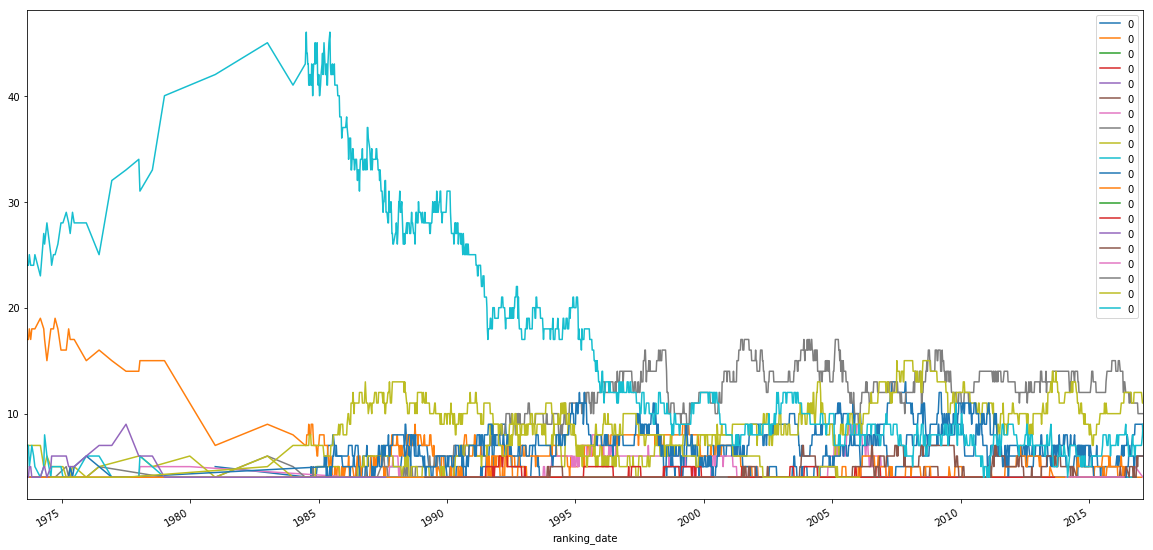

In [121]:
# we can't see much from that figure 